In [1]:
import tweepy

#These will be found on your Twitter Developer Account. These are your personal keys and should not be shared with anyone else.
consumer_key = '###' 
consumer_secret = '###'
access_token = '###'
access_token_secret = '###'

#Creating a variable calling Authentication Handler and passing all of the keys from above as arguments.
auth = tweepy.OAuth1UserHandler(
  consumer_key, 
  consumer_secret, 
  access_token, 
  access_token_secret
)

#Connecting to Twitter API by passing the variable created above that contains all the keys.
api = tweepy.API(auth)

In [39]:
extracted_tweets = []
for status in tweepy.Cursor(api.user_timeline, 
                            screen_name="ethprice_", 
                            count=200).items(3200): 
    extracted_tweets.append(status)

In [43]:
tweet_text=[]
for tweet in extracted_tweets:
        tweet_text.append(tweet.text)

In [73]:
from price_parser import Price
prices=[]
for p in tweet_text:
     price=Price.fromstring(p)
     prices.append(price.amount_float)
        

Split the data into 4 colums where each column is a month

In [89]:
c1=prices[0:800]

In [90]:
c2=prices[800:1600]

In [91]:
c3=prices[1600:2400]

In [92]:
c4=prices[2400:3200]

In [108]:
priceinmonth=pd.DataFrame(data={'c1':c1,'c2':c2,'c3':c3,'c4':c4})

In [109]:
priceinmonth

,c1,c2,c3,c4
0,230.50,167.05,128.97,190.33
1,231.75,168.24,129.00,190.29
2,231.55,168.21,129.42,190.41
3,232.21,168.02,129.51,190.38
4,232.23,167.68,130.68,187.21
...,...,...,...,...
795,170.10,127.41,190.13,174.66
796,170.73,127.46,189.48,173.79
797,169.83,128.23,190.36,175.45
798,169.15,126.56,190.11,175.25


# EDA

In [146]:
import seaborn as sns
sns.set()
sns.set(style="darkgrid")
import numpy as np
import pandas as pd

# importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

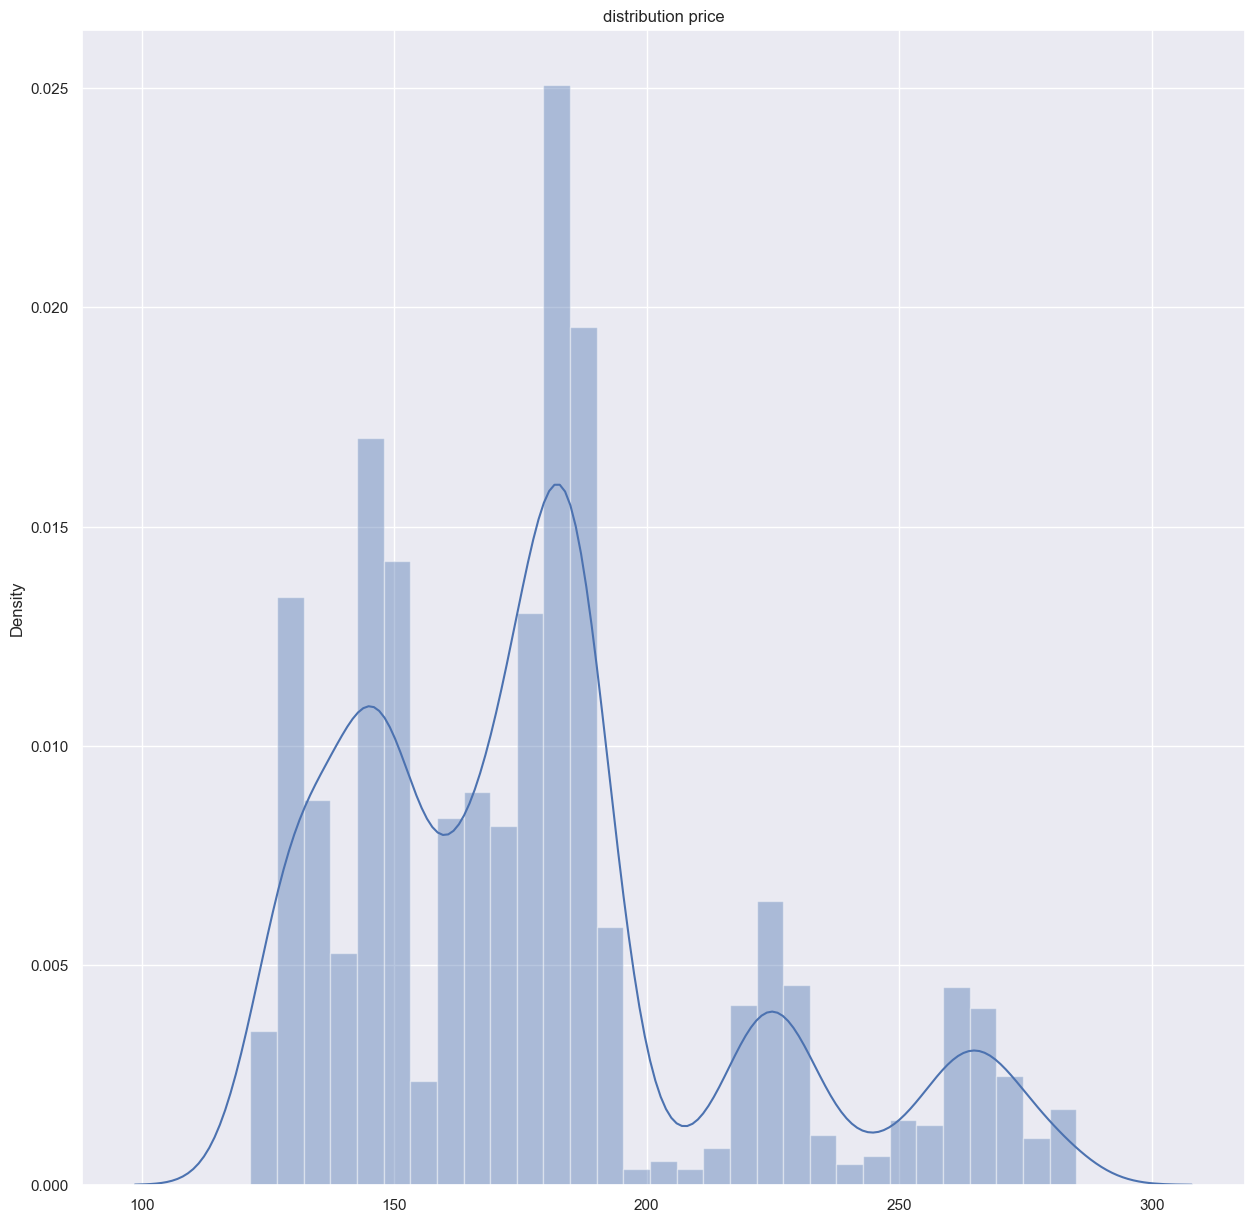

In [147]:
plt.figure(figsize=(15,15))
plt.title("distribution price")
sns.distplot(priceinmonth)
plt.show()


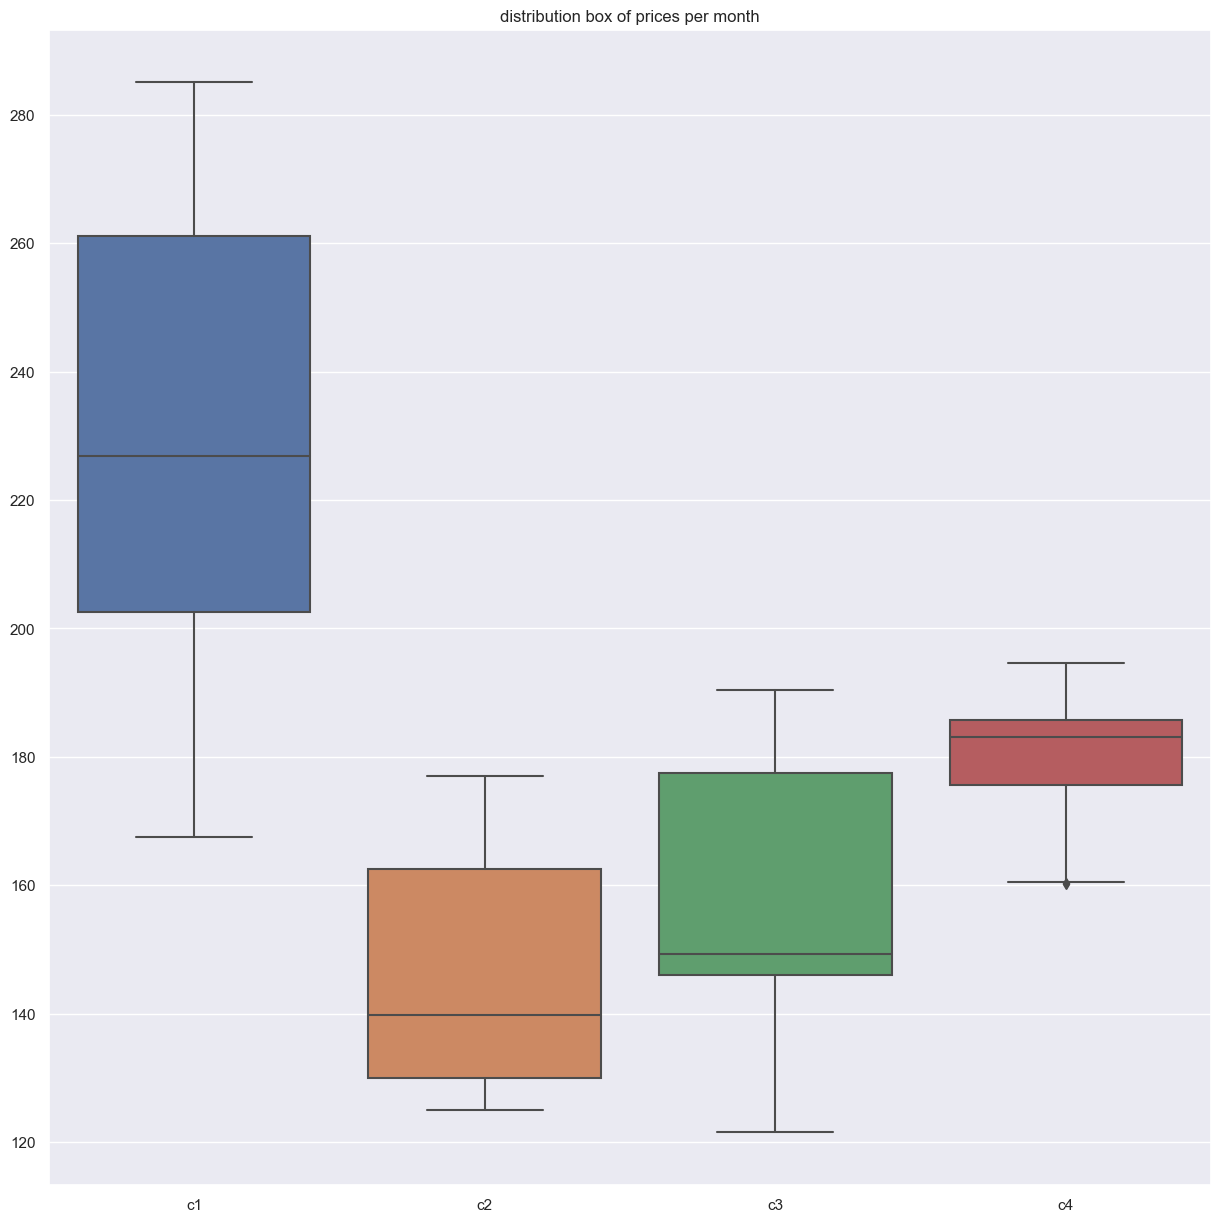

In [148]:
plt.figure(figsize=(15,15))
plt.title("distribution box of prices per month")
sns.boxplot(priceinmonth)
plt.show()

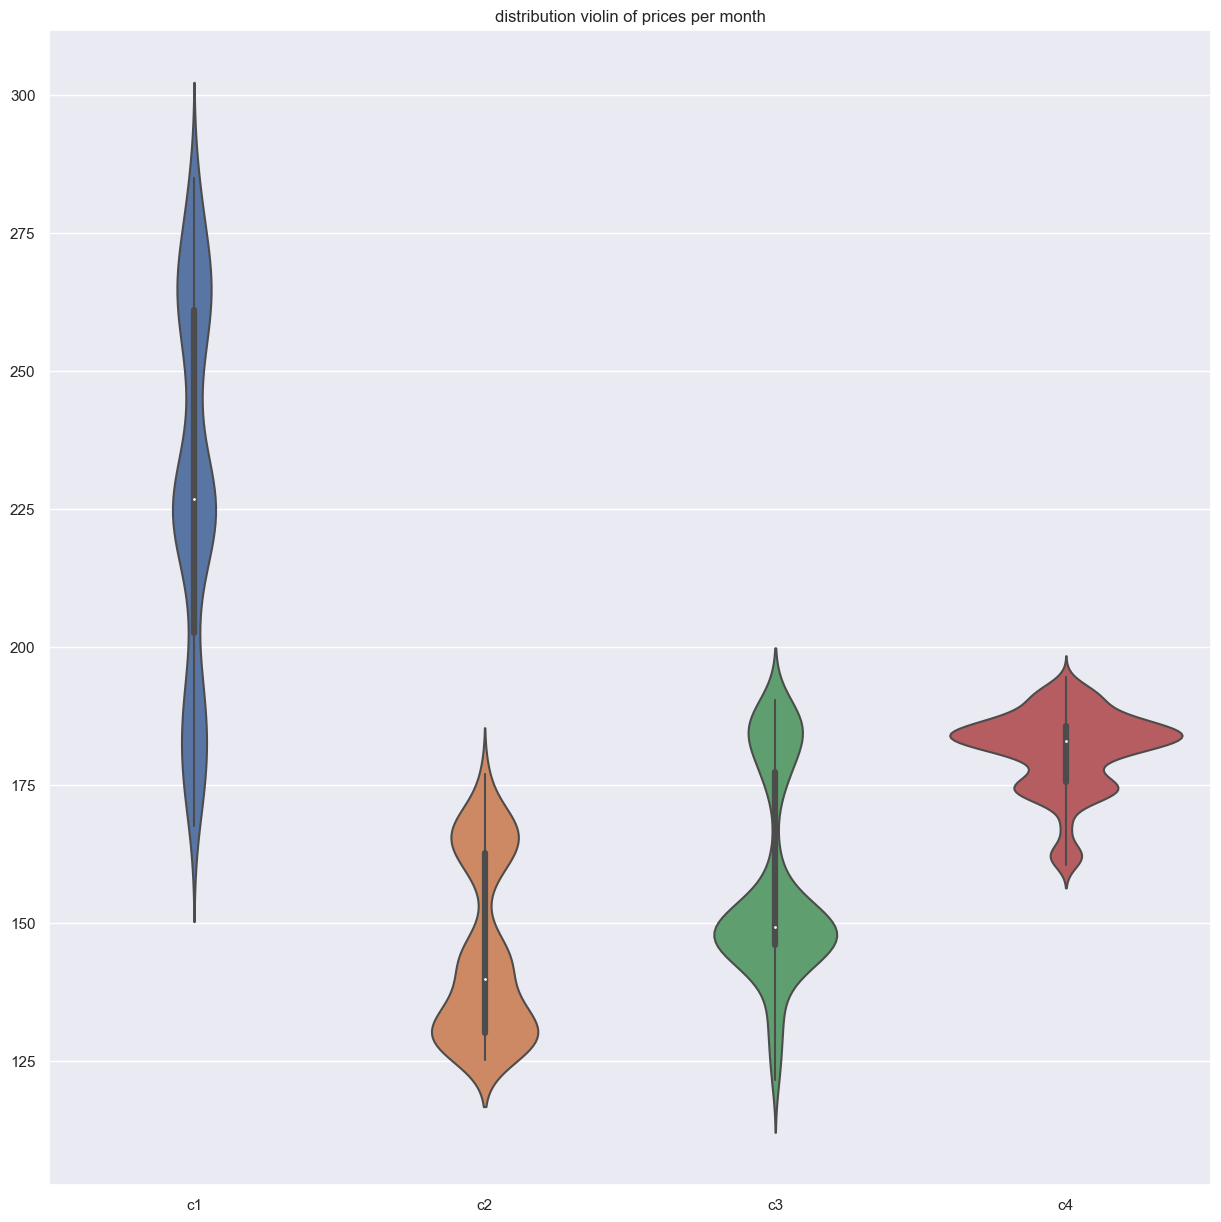

In [149]:
plt.figure(figsize=(15,15))
plt.title("distribution violin of prices per month")
sns.violinplot(priceinmonth)
plt.show()

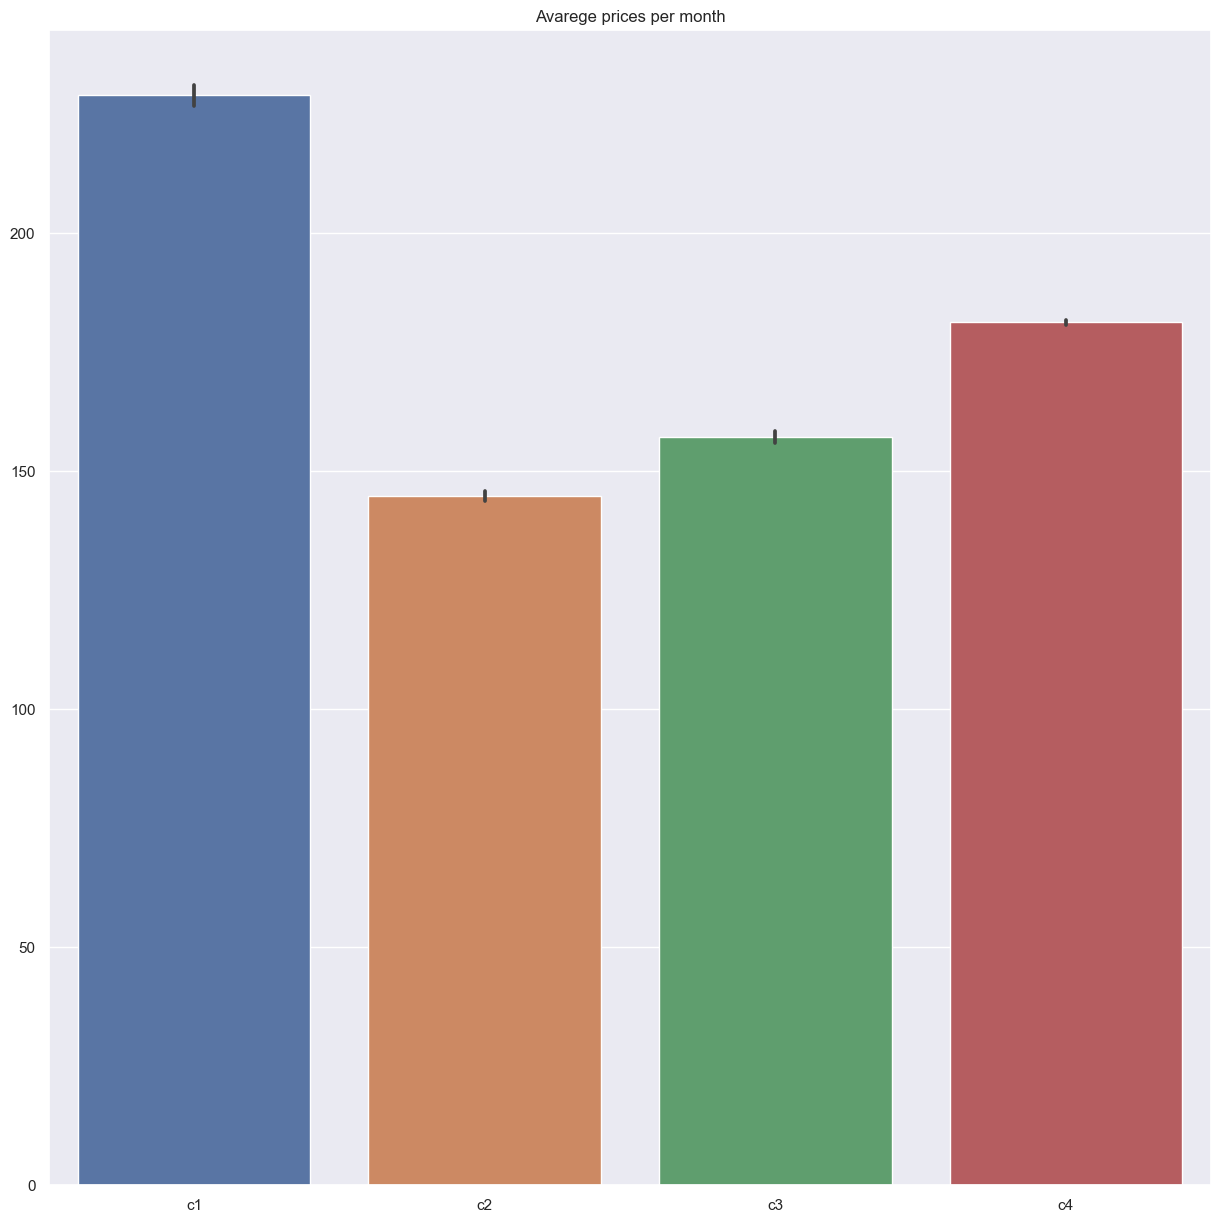

In [150]:

plt.figure(figsize=(15,15))
plt.title("Avarege prices per month")
sns.barplot(priceinmonth)
plt.show()
